<Figure size 800x600 with 0 Axes>

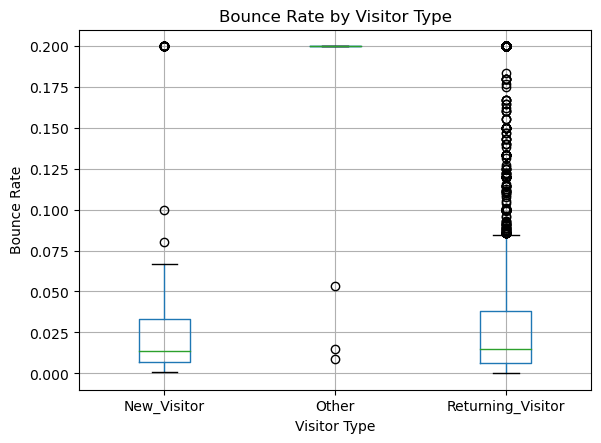

T-Statistic: -0.3184507361595766
P-Value: 0.7501528506605194


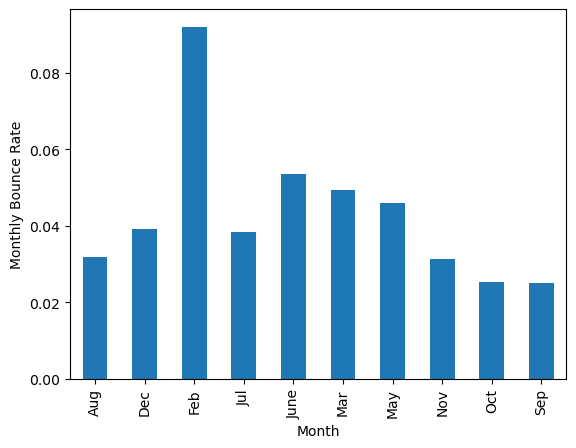

In [12]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("/mnt/research/NOS_mri/CSE801A_Spring2024_A2/online_shoppers_intention.csv")

# Filter out bounce rates of 0
df = df[df['BounceRates'] > 0]


# Create a boxplot comparing bounce rate by visitor type
plt.figure(figsize=(8, 6))
df.boxplot(column='BounceRates', by='VisitorType')
plt.title('Bounce Rate by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Bounce Rate')
plt.suptitle('')  # Remove the default title
plt.show()

# Perform t-test to compare bounce rates of new visitors and returning visitors
new_visitors = df[df['VisitorType'] == 'New_Visitor']['BounceRates']
returning_visitors = df[df['VisitorType'] == 'Returning_Visitor']['BounceRates']
t_statistic, p_value = ttest_ind(new_visitors, returning_visitors)

# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

m_b_r = df.groupby('Month')['BounceRates'].mean()

m_b_r.plot(kind = 'bar')

plt.xlabel('Month')

plt.ylabel('Monthly Bounce Rate')

plt.show()


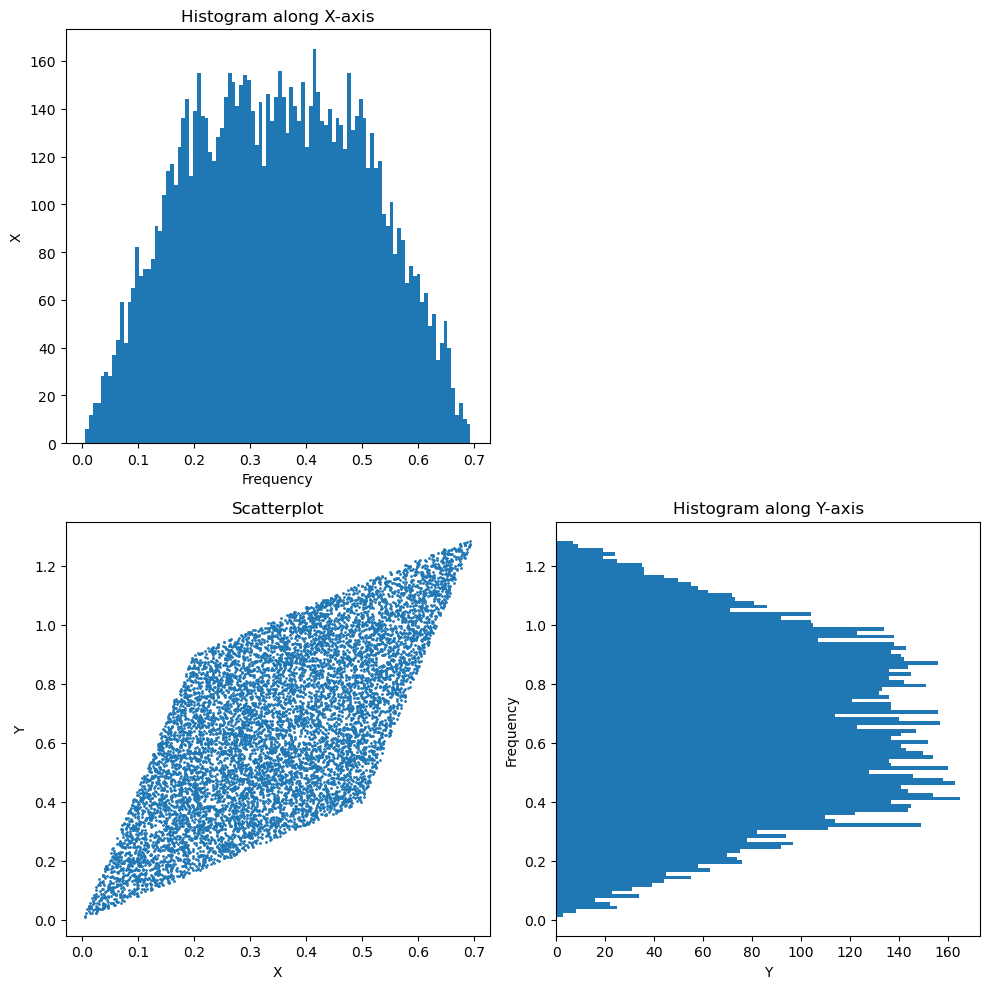

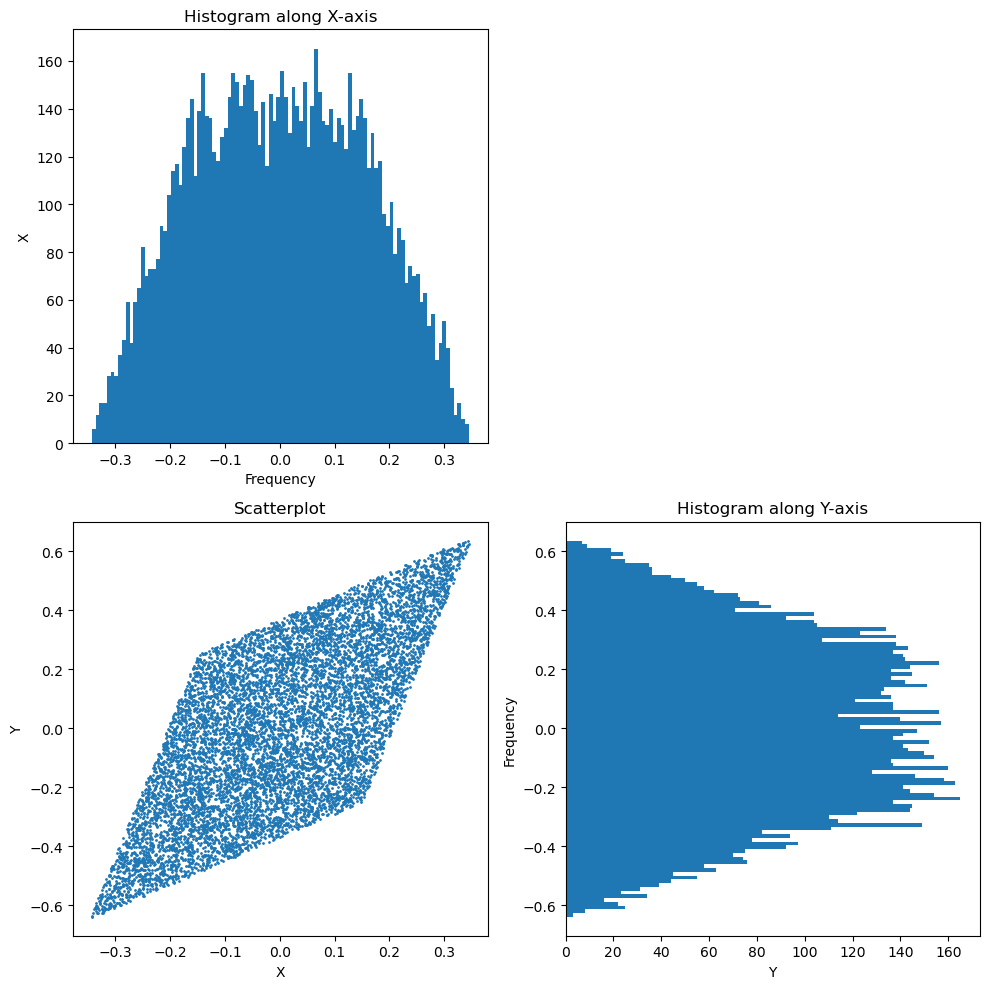

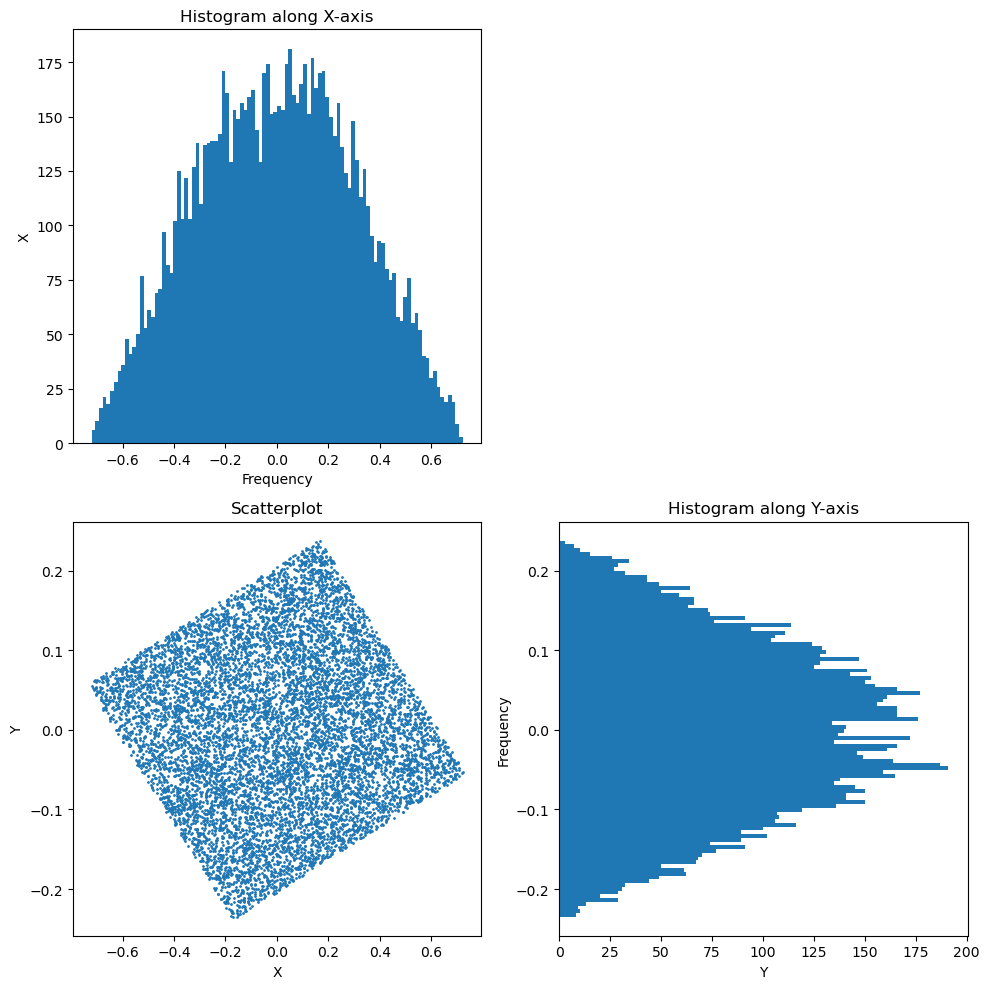

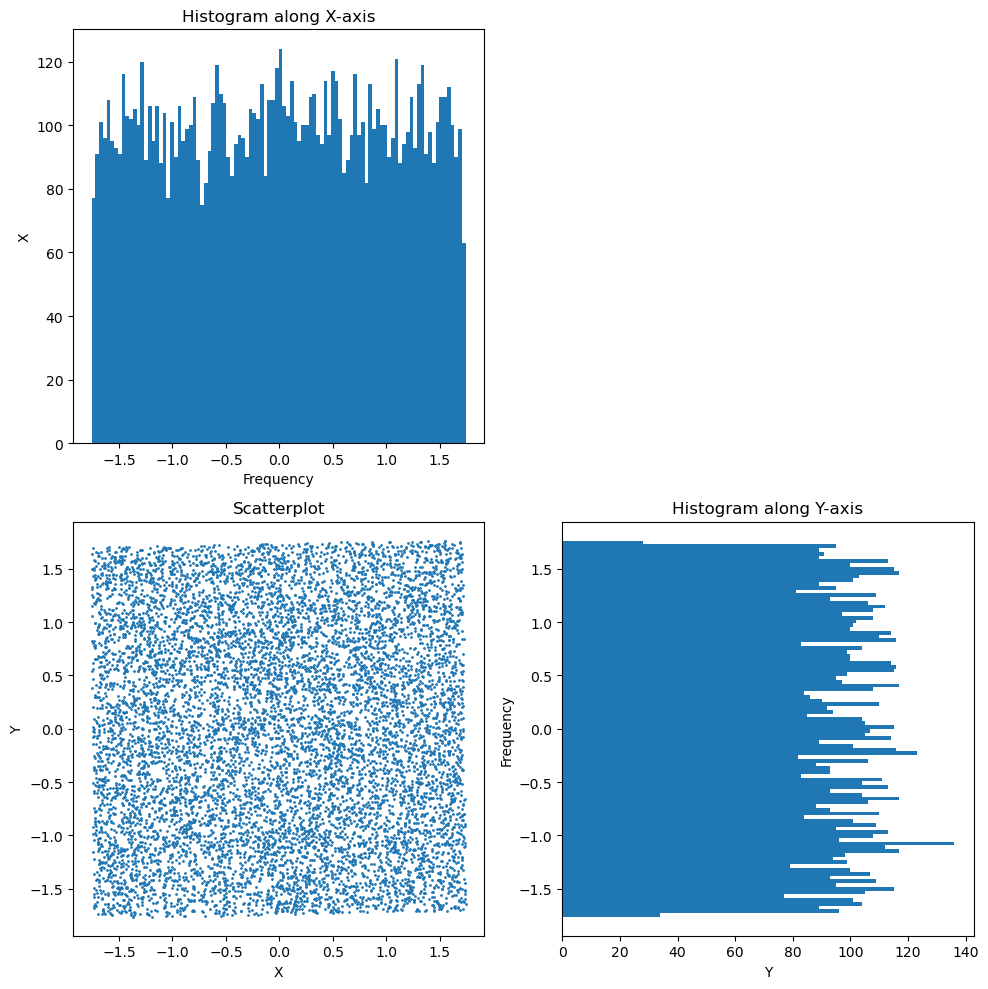

In [7]:
import numpy as np
import pandas as pd
import sys
sys.path.append("/mnt/research/NOS_mri/CSE801A_Spring2024_A2/")
from sklearn.decomposition import PCA, FastICA
from plot_joint import plot_joint

# Load the dist2d.csv file into a variable X
X = pd.read_csv("/mnt/research/NOS_mri/CSE801A_Spring2024_A2/dist2d.csv").values

# Center X
X_centered = X - np.mean(X, axis=0)

# Plot X and the corresponding projected distributions
plot_joint(X)

# Plot centered X
plot_joint(X_centered)

# Perform PCA on centered X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

# Plot the result of PCA
plot_joint(X_pca)

# Perform FastICA on centered X
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_centered)

# Plot the result of FastICA
plot_joint(X_ica)


<Figure size 1000x600 with 0 Axes>

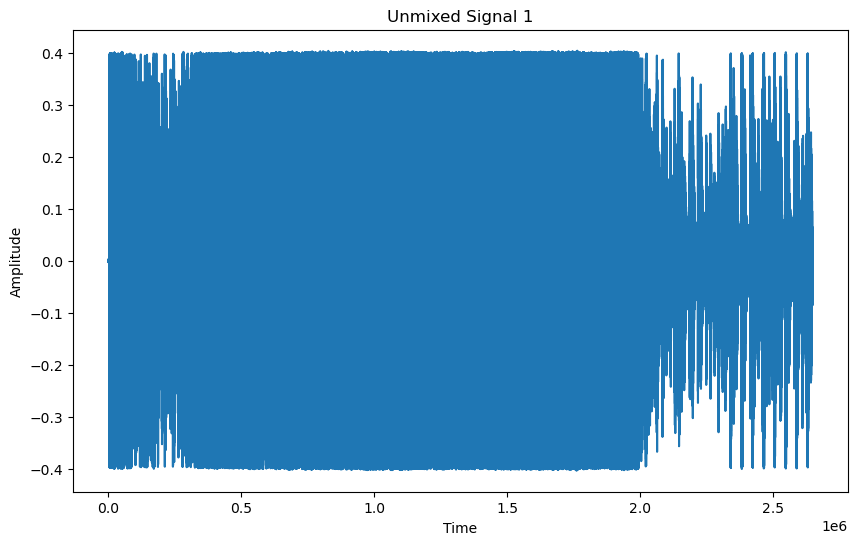

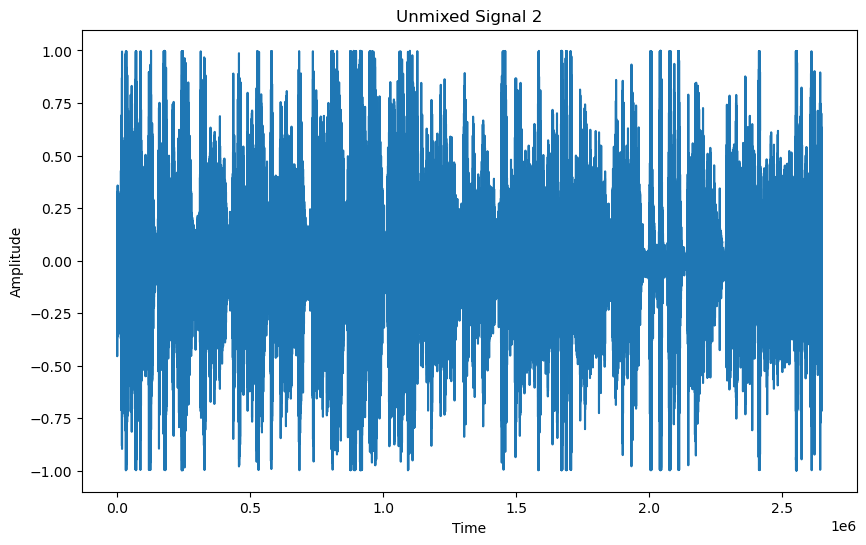

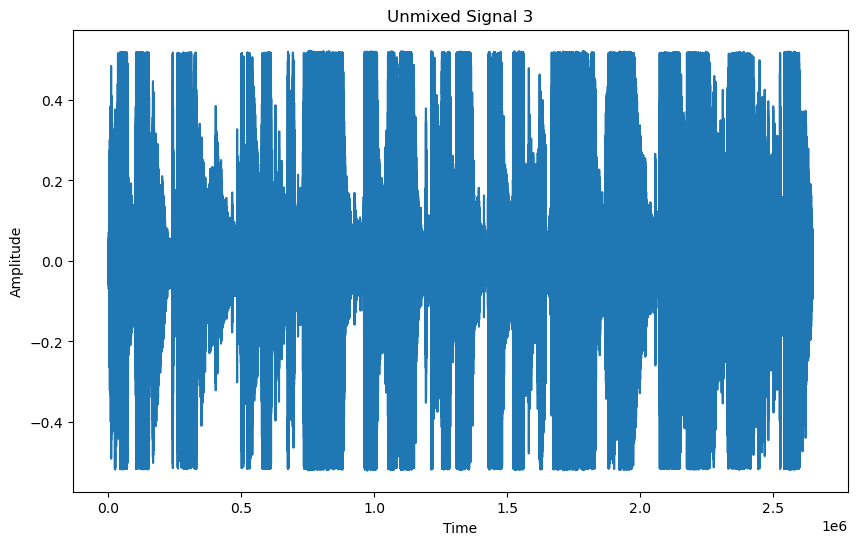

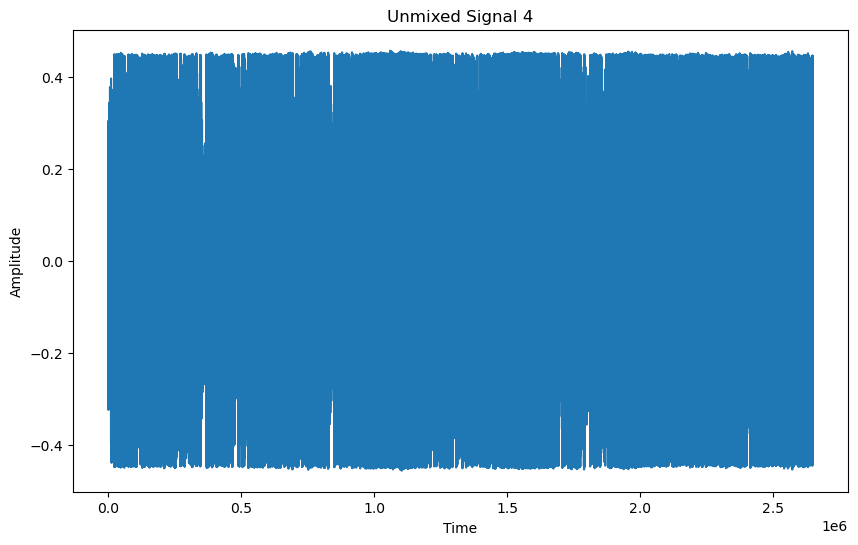

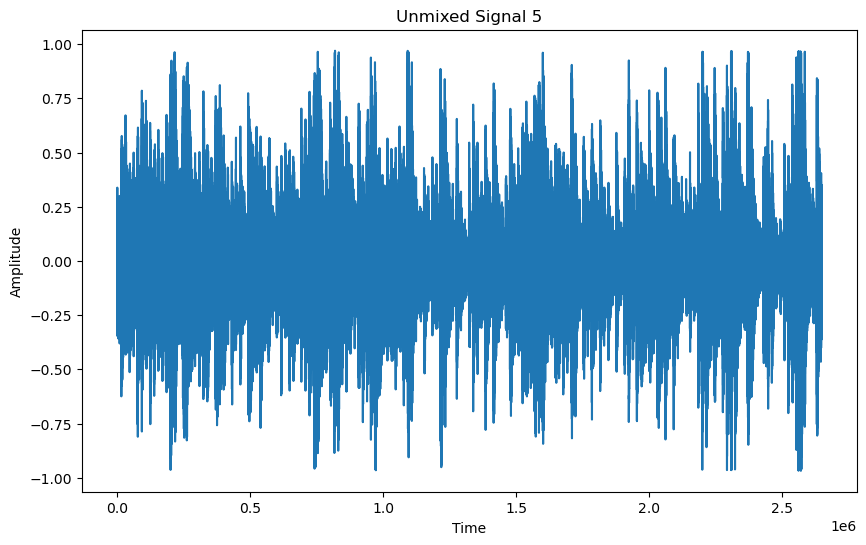

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
from scipy.io import wavfile
from sklearn.decomposition import FastICA

# Load the mixed signals
mix1_rate, mix1_data = wavfile.read('/mnt/home/boddutha/ITM801A_Tharun/Assignment/CSE801A_Spring2024_A2/mix_1.wav')
mix2_rate, mix2_data = wavfile.read('/mnt/home/boddutha/ITM801A_Tharun/Assignment/CSE801A_Spring2024_A2/mix_2.wav')
mix3_rate, mix3_data = wavfile.read('/mnt/home/boddutha/ITM801A_Tharun/Assignment/CSE801A_Spring2024_A2/mix_3.wav')
mix4_rate, mix4_data = wavfile.read('/mnt/home/boddutha/ITM801A_Tharun/Assignment/CSE801A_Spring2024_A2/mix_4.wav')
mix5_rate, mix5_data = wavfile.read('/mnt/home/boddutha/ITM801A_Tharun/Assignment/CSE801A_Spring2024_A2/mix_5.wav')

# Perform FastICA on the mixed signals
mix_data = np.column_stack((mix1_data, mix2_data, mix3_data, mix4_data, mix5_data))
ica = FastICA(n_components=5)
unmixed_data = ica.fit_transform(mix_data)

# Rescale the unmixed signals to a scale from -1 to 1
unmixed_data = unmixed_data / np.max(np.abs(unmixed_data))

# Write out the unmixed signals
wavfile.write('unmixed_1.wav', mix1_rate, unmixed_data[:, 0].astype(np.float32))
wavfile.write('unmixed_2.wav', mix2_rate, unmixed_data[:, 1].astype(np.float32))
wavfile.write('unmixed_3.wav', mix3_rate, unmixed_data[:, 2].astype(np.float32))
wavfile.write('unmixed_4.wav', mix4_rate, unmixed_data[:, 3].astype(np.float32))
wavfile.write('unmixed_5.wav', mix5_rate, unmixed_data[:, 4].astype(np.float32))

import matplotlib.pyplot as plt
import numpy as np

# Plot the time courses of the different unmixed songs
plt.figure(figsize=(10, 6))
for i in range(unmixed_data.shape[1]):
    plt.figure(figsize = (10, 6))
    plt.plot(np.arange(len(unmixed_data)), unmixed_data[:, i])
    plt.title(f"Unmixed Signal {i + 1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()
plt.tight_layout()
plt.show()